In [1]:
from neural_network import * 
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import pickle
logdust_func = open("logdust_3d_func.pkl", "rb")
logdust = pickle.load(logdust_func)

In [2]:
def cart2pol(x, y, z):
    '''Return polar coordinate from cartesian coordinate'''
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    if (x > 0):
        phi = np.arctan(y/x)
    elif (x < 0):
        phi = np.arctan(y/x) +np.pi 
    else:
        phi = np.pi / 2
    return [r, theta, phi] 

def pol2cart(r, theta, phi):
    '''Return cartesian coordinate from polar coordinate'''
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return [x, y, z]

In [3]:
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'axes.titlepad': '15.0'})
rcParams.update({'axes.labelpad': '15.0'})
rcParams.update({'font.size': 20})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=r'\usepackage{amsmath}'

In [4]:
data = np.load('datasets/dustattenuation_3d_err_10samp.npz')
Xgrid, Ygrid = data['Xgrid'], data['dustattenuation_grid']
X_train, X_valid, X_test = data['X_train'], data['X_valid'], data['X_test']
Y_train, Y_valid, Y_test = data['Y_train'], data['Y_valid'], data['Y_test']
Xo_train, Xo_train, Xo_test = data['Xo_train'], data['Xo_valid'], data['Xo_test']
Yo_train, Yo_train, Yo_test = data['Yo_train'], data['Yo_valid'], data['Yo_test']

Remember to change the dataset in neural_network.py

In [15]:
model_A, model_std, train_loss, val_loss, std_vals = train_NN_model()

/home/ava/.local/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



Start of epo ch 0
Training loss (for one batch) at step 0: -697.2431
Seen so far: 100 samples
std prediction:  1.137036
Time taken: 53.35s

Start of epo ch 1
Training loss (for one batch) at step 0: -858.6656
Seen so far: 100 samples
std prediction:  1.027703
Time taken: 52.89s

Start of epo ch 2
Training loss (for one batch) at step 0: -906.0373
Seen so far: 100 samples
std prediction:  0.85073656
Time taken: 52.76s

Start of epo ch 3
Training loss (for one batch) at step 0: -913.4634
Seen so far: 100 samples
std prediction:  0.8442099
Time taken: 51.42s

Start of epo ch 4
Training loss (for one batch) at step 0: -918.3822
Seen so far: 100 samples
std prediction:  0.8438218
Time taken: 52.01s

Start of epo ch 5
Training loss (for one batch) at step 0: -919.1466
Seen so far: 100 samples
std prediction:  0.84374845
Time taken: 52.05s

Start of epo ch 6
Training loss (for one batch) at step 0: -920.4505
Seen so far: 100 samples
std prediction:  0.84372413
Time taken: 51.13s

Start of ep

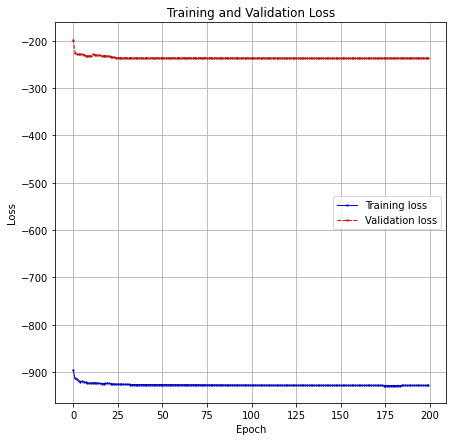

In [3]:
plt.figure(figsize=(7, 7)) 
train_ls_offset = [(t - 0.5604837080093523) * 1/1.6011115387928316 for t in train_loss]
val_ls_offset = [(t - 0.5604837080093523) * 1/1.6011115387928316 for t in val_loss]
plt.plot(train_loss, label='Training loss', color='blue', linestyle='-', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.plot(val_loss, label='Validation loss', color='red', linestyle='dashed', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.savefig('plots/loss_err_2NN.png', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


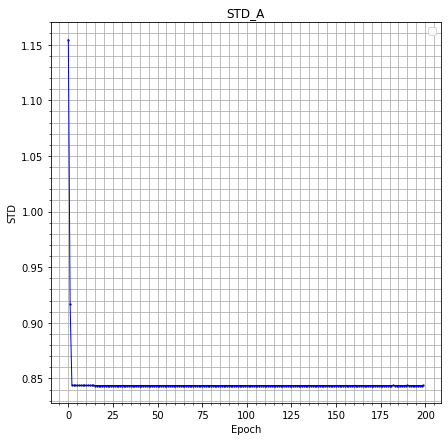

In [4]:
plt.figure(figsize=(7, 7)) 
plt.plot(std_vals, color='blue', linestyle='-', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.xlabel('Epoch')
plt.ylabel('STD')
plt.legend()
plt.minorticks_on()
plt.grid(True, which="major")
plt.grid(True, which="minor")
plt.title('STD_A')
plt.savefig('plots/loss_err_std_2NN.png', bbox_inches='tight')

In [5]:
# model_A.save('3dmodel_cartesion_err_std_2NN')
model_A = tf.keras.models.load_model('3dmodel_cartesion_err_std_2NN')

In [13]:
plt.figure(figsize=(15, 8))
#plotting the loss as a function of log A on the x and y axes. This helps to stretch out the axes, since the errors scale proportional to A
print(np.shape(X_test))
print(X_test[0])
pred = (get_mean_and_std_predictions(model_A, X_test) - 0.111) * 1/1.22

pred_asinh = np.arcsinh(pred)
Y_test_asinh = np.arcsinh(Y_test)

# m, b = np.polyfit(Y_test, pred, 1)
# m_asinh, b_asinh = np.polyfit(Y_test_asinh, pred_asinh, 1)

plt.subplot(1, 2, 1)
plt.scatter(Y_test, pred, s=1, color='blue', linestyle='-', linewidth = 0.2, marker = 'D', edgecolor='black') 
plt.xlabel("Intrinsic " + r'$A(r, \theta, \phi)$')
plt.ylabel("Predicted " + r'$A(r, \theta, \phi))$')
lims = [min(np.amin(Y_test), np.amin(pred)), max(np.amax(Y_test), np.amax(pred))]
plt.xlim(lims)
plt.ylim(lims)
# plt.plot(Y_test, m*Y_test + b)
plt.plot(lims, lims)
plt.title('Intrinsic vs Predicted Data ' +  r'$A(r, \theta, \phi))$')
plt.subplot(1, 2, 2)
plt.scatter(Y_test_asinh, pred_asinh, s=1, color='blue', linestyle='-', linewidth = 0.2, marker = 'D', edgecolor='black') 
plt.xlabel("Intrinsic " + r'$asinh$' + ' ' +  r'$A(r, \theta, \phi))$')
plt.ylabel("Predicted " + r'$asinh$' + ' ' +  r'$A(r, \theta, \phi))$')
lims = [min(np.amin(Y_test_asinh), np.amin(pred_asinh)), max(np.amax(Y_test_asinh), np.amax(pred_asinh))]
plt.xlim(lims)
plt.ylim(lims)
# plt.plot(Y_test_asinh, m_asinh*Y_test_asinh + b_asinh)
plt.plot(lims, lims)
plt.title('Intrinsic vs Predicted Data ' +  r'$asinh$' + ' ' +  r'$A(r, \theta, \phi))$')
plt.tight_layout(pad=3.0)
# plt.savefig('plots/typicalintrinsicvspredicted1.png', bbox_inches='tight')
plt.savefig('plots/intrinsic_vs_predicted_asinh_A_3d_2NN.png', bbox_inches='tight')

# print(m, b)
# print(m_asinh, b_asinh)

(2000, 3)
[ 0.114294 -1.394224  2.469716]


TypeError: get_mean_and_std_predictions() missing 1 required positional argument: 'X_data'

<Figure size 1080x576 with 0 Axes>

In [13]:
dA_dx = []
dA_dy = []
dA_dz = []

norm = model_A.get_layer('norm')
dense_1 = model_A.get_layer('dense_1')
dense_2 = model_A.get_layer('dense_2')
dense_3 = model_A.get_layer('dense_3')
pred = model_A.get_layer('predictions')

for x,y,z in Xgrid:
    xyz = tf.constant([x, y, z])
    with tf.GradientTape() as g:
        g.watch(xyz)
        Y = pred(dense_3(dense_2(dense_1(norm(tf.convert_to_tensor([xyz]))))))
    dA_dxyz = g.gradient(Y, xyz)
    dA_dx.append(dA_dxyz[0])
    dA_dy.append(dA_dxyz[1])
    dA_dz.append(dA_dxyz[2])

In [14]:
r = np.sqrt(np.square(Xgrid[:, 0]) + np.square(Xgrid[:, 1]) + np.square(Xgrid[:, 2]))
x = Xgrid[:, 0]
y = Xgrid[:, 1]
z = Xgrid[:, 2]
x_over_r = np.divide(x, r)
y_over_r = np.divide(y, r)
z_over_r = np.divide(z, r)
dA_dr = np.multiply(dA_dx, x_over_r) + np.multiply(dA_dy, y_over_r) + np.multiply(dA_dz, z_over_r)
intrinsic = [np.exp(logdust(x,y,z)) for x,y,z in Xgrid]

<ipython-input-14-67d4ed5d4d16>:5: RuntimeWarning: invalid value encountered in true_divide
  x_over_r = np.divide(x, r)
<ipython-input-14-67d4ed5d4d16>:6: RuntimeWarning: invalid value encountered in true_divide
  y_over_r = np.divide(y, r)
<ipython-input-14-67d4ed5d4d16>:7: RuntimeWarning: invalid value encountered in true_divide
  z_over_r = np.divide(z, r)


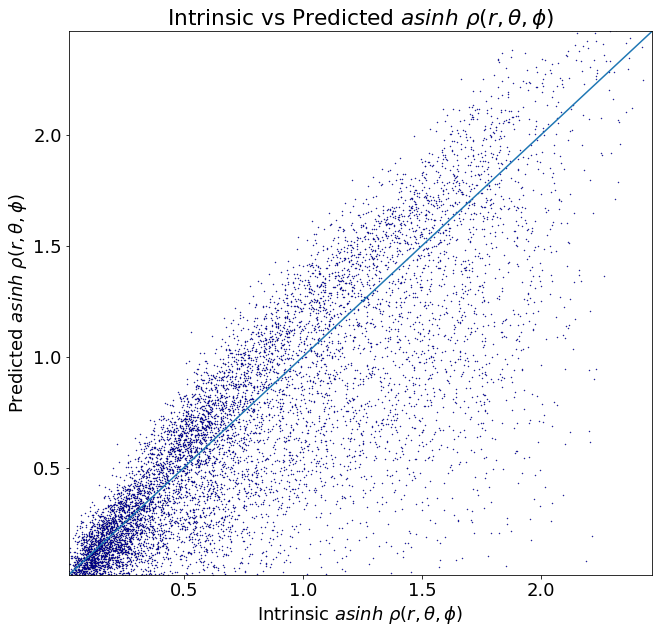

In [15]:
rcParams.update({'font.size': 18})
plt.figure(figsize=(23, 10))
plt.subplot(1, 2, 1)
intrinsic_arcsinh = np.arcsinh(intrinsic)
dA_dr_asinh = np.arcsinh(dA_dr)
plt.scatter(intrinsic_arcsinh, dA_dr_asinh, s=1, color='blue', linestyle='-', linewidth = 0.2, marker = 'D', edgecolor='black') 
plt.xlabel("Intrinsic " + r'$asinh$' + ' ' + r'$\rho(r, \theta, \phi)$')
plt.ylabel("Predicted " + r'$asinh$' + ' ' + r'$\rho(r, \theta, \phi)$')
lims = [min(np.amin(intrinsic_arcsinh), np.amin(dA_dr_asinh)), max(np.amax(intrinsic_arcsinh), np.amax(dA_dr_asinh))]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.title('Intrinsic vs Predicted ' + r'$asinh$' + ' ' + r'$\rho(r, \theta, \phi)$')
plt.savefig('plots/intrinsic_vs_predicted_dust.png', bbox_inches='tight')

#### Cross sectional view

In [7]:
# generate a list of points along line of sight to X_test first star -- set a fixed value for x, y, z
delta_r = 0.001
ngrid, edge = 21, 2.5
max_r = edge * 2

In [8]:
for i in range(1, 10):
    x, y, z = X_test[i]
    r, theta, phi = cart2pol(x, y, z)
    los_pos = []
    los_pos_r = []
    valid_r = 0

    for r_prime in np.arange(0, max_r, delta_r):
        pos_prime = pol2cart(r_prime, theta, phi)
        los_pos.append(pos_prime)
        los_pos_r.append(r_prime)
        x_prime, y_prime, z_prime = pos_prime[0], pos_prime[1], pos_prime[2]
        # print(x_prime, y_prime, z_prime)
        if (x_prime > edge or x_prime < -edge or y_prime > edge or y_prime < -edge or z_prime > edge or z_prime < -edge) and valid_r == 0:
            valid_r = r_prime 

    los_pos = np.asarray(los_pos)
    # pred = get_NN_pred(model_A, los_pos)
    # pred = get_mean_and_std_predictions(model_A, model_std, los_pos)

    r_samples = []

    for x, y, z in Xo_test[i]:
        r, theta, phi = cart2pol(x, y, z)
        r_samples.append(r)
    
    plt.figure(figsize=(7, 7)) 
    plt.plot(los_pos_r, pred, color='#8f0000', linestyle='-', linewidth = 1, marker = 'o', ms = 1, markeredgewidth=0.2)
    plt.scatter(r_samples, Yo_test[i], s=5, linewidths=0.2, edgecolors='black')
    plt.axvline(x = valid_r, color='black')
    plt.xlabel('r')
    plt.ylabel('A(r)')
    plt.xlim([0, max_r])
    plt.ylim([0, 10])
    x, y, z = X_test[i][0], X_test[i][1], X_test[i][2]
    r, theta, phi = cart2pol(x, y, z)
    plt.title(str(np.around(x / r, 2)) + 'i + ' + str(np.around(y/r, 2)) + 'j + ' + str(np.around(z/r, 2)) + ' k')
    plt.savefig('plots/los_plots2/' + str(i) + '.png', bbox_inches='tight')
    plt.close()

ValueError: cannot reshape array of size 15000 into shape (50000,3)

In [51]:
ngrid =21
edge = 2.5
dA_dr_log = np.log(dA_dr)

for i in range(21):
    fig = plt.figure(figsize=(20, 16))
    ax = fig.add_subplot(111, projection='3d')
    end = ngrid*ngrid*(i+1)

    ind = [i for i,val in enumerate(dA_dr[0:end]) if val <= 0 ]
    dustneg = [-1] * len(ind)
    xneg = [Xgrid[:, 0][0:end][i] for i in ind]
    yneg = [Xgrid[:, 1][0:end][i] for i in ind]
    zneg = [Xgrid[:, 2][0:end][i] for i in ind]
    im = ax.scatter(xneg, yneg, zneg, color='#7FFF00', s=200, vmin=-4, vmax=1.5, alpha=1) #invalid green points
    # im = ax.scatter(Xgrid[:, 0][0:end], Xgrid[:, 1][0:end], Xgrid[:, 2][0:end], c=np.log(Ygrid[0:end]), cmap='plasma', s=200, norm=matplotlib.colors.PowerNorm(gamma=0.9), vmin=-4, vmax=1.5)
    im = ax.scatter(Xgrid[:, 0][0:end], Xgrid[:, 1][0:end], Xgrid[:, 2][0:end], c=dA_dr_log[0:end] - np.log(Ygrid[0:end]), cmap='coolwarm', s=150, vmin=-1.5, vmax=1.5)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    cbar = plt.colorbar(im, shrink=0.85)
    cbar.set_label('predicted logdust')
    plt.tight_layout()
    plt.xlim((-edge, edge))
    plt.ylim((-edge, edge))
    plt.savefig('plots/err-dust-intrinsic/' + str(i) + '.png', bbox_inches='tight')
    plt.close()

# setting back the intrinsic set
# intrinsic = [np.exp(logdust(x,y)) for x,y in X_test_cart]

<ipython-input-51-1bca4ffd1e23>:3: RuntimeWarning: invalid value encountered in log
  dA_dr_log = np.log(dA_dr)
<ipython-input-51-1bca4ffd1e23>:17: RuntimeWarning: divide by zero encountered in log
  im = ax.scatter(Xgrid[:, 0][0:end], Xgrid[:, 1][0:end], Xgrid[:, 2][0:end], c=dA_dr_log[0:end] - np.log(Ygrid[0:end]), cmap='coolwarm', s=150, vmin=-1.5, vmax=1.5)
